In [1]:
import sys
sys.path.append('/home/waves8/Thy/Wikipedia-Knowledge-Graph')
import os
os.chdir("/home/waves8/Thy/Wikipedia-Knowledge-Graph")
from src.utils.wiki_article_regressor import *
from src.utils.helpper_function import *
import pickle
stop = stopwords.words('english')

In [2]:
misspell_data = pd.read_csv("data/aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

In [3]:
def misspelled_correction(val):
    for x in val.split(): 
        if x in miss_corr.keys(): 
            val = val.replace(x, miss_corr[x]) 
    return val
def cont_to_meaning(val): 
    for x in val.split(): 
        if x in cont_dic.keys(): 
            val = val.replace(x, cont_dic[x]) 
    return val
def punctuation(val): 
    punctuations = '''()-[]{};:'"\,<>./@#$%^&_~*.!!'''
    for x in val.lower(): 
        if x in punctuations: 
            val = val.replace(x, " ") 
    return val

def replace_special_punctua(val):
    val = val.replace('...', " ")
    val = val.replace('*', " ")
    val = val.replace('***', " ")
    val = val.replace('****', " ")
    val = val.replace('   ', " ")
    val = val.replace('  ', " ")
    val = val.replace(', , ', "")
    return val

def clean_text(val):
    stop = stopwords.words('english')
    val = misspelled_correction(val)
    val = ' '.join(val.lower().split())
    val = cont_to_meaning(val)
    val = p.clean(val)
    val = ' '.join(punctuation(emoji.demojize(val)).split())
    val = ' '.join(replace_special_punctua(val).split())
#     val = ' '.join([word for word in val.split() if word not in (stop)])
    return val

sent_to_id  = {"fa":0, "c":1,"start":2,"stub":3,"b":4, "ga":5}

In [4]:
from tensorflow.keras.models import Sequential, load_model, Model
model = load_model('model/model_lsmt_final')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
import keras.preprocessing.text as kpt
from keras.preprocessing import sequence, text
import preprocessor as p
import emoji
from tensorflow.keras.models import load_model
from keras.preprocessing import sequence, text
from tensorflow.keras.preprocessing.text import Tokenizer
def convert_text_to_index_array(text, tokenizer_path):
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in tokenizer:
            wordIndices.append(tokenizer[word])
        else:
            print("'%s' not in training corpus; ignoring." %(word))
    return wordIndices

Using TensorFlow backend.


In [6]:
def get_ranking(model,tokenizer_path,texts):
    text = clean_text(texts)
    twt = convert_text_to_index_array(text,tokenizer_path)
    twt = sequence.pad_sequences([twt], maxlen=1000, dtype='int32')
    sentiment = model.predict(twt,batch_size=1,verbose = 2)
    sent = np.round(np.dot(sentiment,100).tolist(),0)[0]
    label = np.argmax(sent)
    return label

In [20]:
df_test = pd.read_csv('data_train_test/data_train_val.csv')

In [21]:
df_test = df_test.drop_duplicates(subset = 'raw_text')

In [22]:
df_test['predict'] = df_test.apply(lambda x: get_ranking(model, 'model/tokenizer_ranking.pickle', x['clean_content']), axis = 1)

 - 0s
'behaviorist' not in training corpus; ignoring.
'behaviorist' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'singles76foot' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'dueing' not in training corpus; ignoring.
'dueing' not in training corpus; ignoring.
'dueing' not in training corpus; ignoring.
'dueing' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'nondefence' not in training corpus; ignoring.
 - 0s
 - 0s
'marshal19471949dean' not in training corpus; ignoring.
'marshal19501951robert' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'behaviorpeople' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'behaviornorthern' not in training corpus; ignoring.
 - 0s
 - 

 - 0s
 - 0s
 - 0s
'misjudgements' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'defenseconnecticut' not in training corpus; ignoring.
'defensesouth' not in training corpus; ignoring.
 - 0s
 - 0s
'marshalbetween' not in training corpus; ignoring.
 - 0s
'defensesthe' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'democraticrepublicanprohibition' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'dueruti' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'simon19741977defencejames' n

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'rewiring' not in training corpus; ignoring.
'igod' not in training corpus; ignoring.
'birkerts' not in training corpus; ignoring.
'birkerts' not in training corpus; ignoring.
'inaptitude' not in training corpus; ignoring.
'birkerts' not in training corpus; ignoring.
'atrophying' not in training corpus; ignoring.
'birkerts' not in training corpus; ignoring.
'googled' not in training corpus; ignoring.
'rewiring' not in training corpus; ignoring.
'igod' not in training corpus; ignoring.
'birkerts' not in training corpus; ignoring.
'synopsisat' not in training corpus; ignoring.
'unburden' not in training corpus; ignoring.
'taylorism' not in training corpus; ignoring.
'taylorism' not in training corpus; ignoring.
'skepticisms' not in training corpus; ignoring.
'hieronimo' not in training corpus; ignoring.
'squarciaficos' not in training corpus; ignoring.
'defrancis' not in training corpus; ignoring.
'defrancis' not in training corpus; ignoring.
'luddism' not i

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'mcwhiggin' not in training corpus; ignoring.
'showjessie' not in training corpus; ignoring.
'peteare' not in training corpus; ignoring.
'morosely' not in training corpus; ignoring.
'mcwhiggin' not in training corpus; ignoring.
'zurgproductiondevelopmenttalk' not in training corpus; ignoring.
'lasseterlasseters' not in training corpus; ignoring.
'mcwhiggin' not in training corpus; ignoring.
'doody' not in training corpus; ignoring.
'animationas' not in training corpus; ignoring.
'musictoy' not in training corpus; ignoring.
'releasepixar' not in training corpus; ignoring.
'angelesthe' not in training corpus; ignoring.
'storysand' not in training corpus; ignoring.
'gamestoy' not in training corpus; ignoring.
'mediatoy' not in training corpus; ignoring.
'stereographer' not in training corpus; ignoring.
'responsetoy' not in training corpus; ignoring.
'moviegoing' not in training corpus; ignoring

 - 0s
 - 0s
'megyeri' not in training corpus; ignoring.
'showfor' not in training corpus; ignoring.
'grippy' not in training corpus; ignoring.
'megamerican' not in training corpus; ignoring.
'lincolnish' not in training corpus; ignoring.
'superstantial' not in training corpus; ignoring.
'eneagled' not in training corpus; ignoring.
'flagaphile' not in training corpus; ignoring.
'gutly' not in training corpus; ignoring.
'factose' not in training corpus; ignoring.
'346x' not in training corpus; ignoring.
'346x' not in training corpus; ignoring.
'threatdown' not in training corpus; ignoring.
'repor' not in training corpus; ignoring.
'procedurals' not in training corpus; ignoring.
'untaped' not in training corpus; ignoring.
'popularityor' not in training corpus; ignoring.
'stewartduring' not in training corpus; ignoring.
'showswhich' not in training corpus; ignoring.
'colbertthe' not in training corpus; ignoring.
'factose' not in training corpus; ignoring.
'arctophobia' not in training corp

 - 0s
 - 0s
 - 0s
 - 0s
'biofuel' not in training corpus; ignoring.
'bagasse' not in training corpus; ignoring.
'petrobras' not in training corpus; ignoring.
'ethanolblend' not in training corpus; ignoring.
'ethanolblend' not in training corpus; ignoring.
'ethanolblend1931e51987' not in training corpus; ignoring.
'e222002' not in training corpus; ignoring.
'e24' not in training corpus; ignoring.
'e111989' not in training corpus; ignoring.
'e18' not in training corpus; ignoring.
'132003' not in training corpus; ignoring.
'e101992' not in training corpus; ignoring.
'e13' not in training corpus; ignoring.
'e201978' not in training corpus; ignoring.
'e18' not in training corpus; ignoring.
'231993' not in training corpus; ignoring.
'e221981' not in training corpus; ignoring.
'e242006e201982' not in training corpus; ignoring.
'e15' not in training corpus; ignoring.
'2007e23' not in training corpus; ignoring.
'251984' not in training corpus; ignoring.
'2008e25source' not in training corpus; i

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'floydbassist' not in training corpus; ignoring.
'wrightparticipated' not in training corpus; ignoring.
'zabriski' not in training corpus; ignoring.
'londonfor' not in training corpus; ignoring.
'24may25june' not in training corpus; ignoring.
'recordingalan' not in training corpus; ignoring.
'synthesizeralong' not in training corpus; ignoring.
'voicesperhaps' not in training corpus; ignoring.
'receptiondark' not in training corpus; ignoring.
'11x' not in training corpus; ignoring.
'q4shvl' not in training corpus; ignoring.
'yahel' not in training corpus; ignoring.
'hoenig' not in training corpus; ignoring.
'listingtimings' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'confronation' not in training corpus; ignoring.
'backgroundedward' not in training corpus; ignoring.
'1260s' not in training corpus; ignoring.
'12841307' not in training corpus; ignoring.
'birthcaernarf

 - 0s
'celsior' not in training corpus; ignoring.
'600h' not in training corpus; ignoring.
'600h' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'sketchin' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'1uz' not in training corpus; ignoring.
'735i' not in training corpus; ignoring.
'e32' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'electrochromic' not in training corpus; ignoring.
'electroluminescent' not in training corpus; ignoring.
'nakamichi' not in training corpus; ignoring.
'fairings' not in training corpus; ignoring.
'celsior' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'majesta' not in training corpus; ignoring.
'celsior' not in training corpus; ignoring.
'celsior' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'ucf10' not in training corpus; ignoring.
'ucf10' not in training corpus; ign

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'gothmog' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'18671894' not in training corpus; ignoring.
'hegelians' not in training corpus; ignoring.
'rheinische' not in training corpus; ignoring.
'franzsische' not in training corpus; ignoring.
'jahrbcher' not in training corpus; ignoring.
'rheinische' not in training corpus; ignoring.
'18181835marxs' not in training corpus; ignoring.
'brckergasse' not in training corpus; ignoring.
'merier' not in training corpus; ignoring.
'meriers' not in training corpus; ignoring.
'hirschel' not in training corpus; ignoring.
'hirschel' not in training corpus; ignoring.
'wyttenbach' not in training corpus; ignoring.
'wyttenbach' not in training corpus; ignoring.
'landsmannschaft' not in training corpus; ignoring.
'treveraner' not in training corpus; ignoring.
'18361843in' not in training corpus; ignoring.
'pauluskirche' not in training corpus; ignoring.
'17701831' not in training corpus; 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'e74' not in training corpus; ignoring.
'rrod' not in training corpus; ignoring.
'dvd9' not in training corpus; ignoring.
'exclusives' not in training corpus; ignoring.
'exclusives' not in training corpus; ignoring.
'exclusives' not in training corpus; ignoring.
'bladestorm' not in training corpus; ignoring.
'exclusives' not in training corpus; ignoring.
'exclusives' not in training corpus; ignoring.
'goichi' not in training corpus; ignoring.
'goichi' not in training corpus; ignoring.
'11higher' not in training corpus; ignoring.
'namexbox' not in training corpus; ignoring.
'360playstation' not in training corpus; ignoring.
'3wiiconsole' not in training corpus; ignoring.
'130pxrelease' not in training corpus; ignoring.
'20gb' not in training corpus; ignoring.
'60gb' not in training corpus; ignoring.
'80gb' not in training corpus; ignoring.
'000europe' not in training corpus; ignoring.
'rsx' not in training corpus; ignoring.
'g70' not in training corpu

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'prestune' not in training corpus; ignoring.
'historyetymologypreston' not in training corpus; ignoring.
'prestune' not in training corpus; ignoring.
'prestonam' not in training corpus; ignoring.
'prestone' not in training corpus; ignoring.
'prestona' not in training corpus; ignoring.
'presteton' not in training corpus; ignoring.
'prestun' not in training corpus; ignoring.
'presta' not in training corpus; ignoring.
'presta' not in training corpus; ignoring.
'developmentduring' not in training corpus; ignoring.
'luguvalium' not in training corpus; ignoring.
'ribbles' not in training corpus; ignoring.
'merchantthe' not in training corpus; ignoring.
'decollation' not in training corpus; ignoring.
'avenham' not in training corpus; ignoring.
'prestonin' not in training corpus; ignoring.
'tulketh' not in training corpus; ignoring.
'revolutionplaque' not in training corpus; ignoring.
'prestonthe' not in training corpus; i

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'abortionbreast' not in training corpus; ignoring.
'abortionbefore' not in training corpus; ignoring.
'trimesterthen' not in training corpus; ignoring.
'abortionbreast' not in training corpus; ignoring.
'abortionbreast' not in training corpus; ignoring.
'abortionbreast' not in training corpus; ignoring.
'proponentsjoel' not in training corpus; ignoring.
'brind' not in training corpus; ignoring.
'brind' not in training corpus; ignoring.
'brind' not in training corpus; ignoring.
'jech' not in training corpus; ignoring.
'jech' not in training corpus; ignoring.
'brinds' not in training corpus; ignoring.
'brind' not in training corpus; ignoring.
'bcpi' not in training corpus; ignoring.
'lanfranchi' not in training corpus; ignoring.
'brind' not in training corpus; ignoring.
'mechanismlobules' not in training corpus; ignoring.
'lobules' not in training corpus; ignoring.
'lobules' not in training corpus; ignoring.
'ductules' not in training corpus; ignoring.
'duct

 - 0s
'huemer' not in training corpus; ignoring.
'fantasound' not in training corpus; ignoring.
'fantasound' not in training corpus; ignoring.
'trailerfantasia' not in training corpus; ignoring.
'zauberlehrling' not in training corpus; ignoring.
'fauns' not in training corpus; ignoring.
'ponchielli' not in training corpus; ignoring.
'upanova' not in training corpus; ignoring.
'elephanchine' not in training corpus; ignoring.
'chernabog' not in training corpus; ignoring.
'numbersregardless' not in training corpus; ignoring.
'timeput' not in training corpus; ignoring.
'concertsomething' not in training corpus; ignoring.
'huemer' not in training corpus; ignoring.
'tibbett' not in training corpus; ignoring.
'cydalise' not in training corpus; ignoring.
'cydalise' not in training corpus; ignoring.
'fauns' not in training corpus; ignoring.
'fauns' not in training corpus; ignoring.
'highbrowski' not in training corpus; ignoring.
'musicnot' not in training corpus; ignoring.
'zauberlehrling' not 

 - 0s
 - 0s
 - 0s
'1371john' not in training corpus; ignoring.
'irobert' not in training corpus; ignoring.
'methven' not in training corpus; ignoring.
'iidavid' not in training corpus; ignoring.
'1513robert' not in training corpus; ignoring.
'iijames' not in training corpus; ignoring.
'arkinholm' not in training corpus; ignoring.
'iiijames' not in training corpus; ignoring.
'gueldres' not in training corpus; ignoring.
'sauchieburn' not in training corpus; ignoring.
'ivjames' not in training corpus; ignoring.
'dunbarton' not in training corpus; ignoring.
'huntlys' not in training corpus; ignoring.
'flooers' not in training corpus; ignoring.
'demographybecause' not in training corpus; ignoring.
'farmable' not in training corpus; ignoring.
'agriculturescotland' not in training corpus; ignoring.
'farmtoun' not in training corpus; ignoring.
'burghsprovands' not in training corpus; ignoring.
 - 0s
'1945less' not in training corpus; ignoring.
'laterthe' not in training corpus; ignoring.
'year

 - 0s
 - 0s
 - 0s
 - 0s
'defenseminister' not in training corpus; ignoring.
'servicetwo' not in training corpus; ignoring.
'heantwo' not in training corpus; ignoring.
'defenseng' not in training corpus; ignoring.
 - 0s
 - 0s
'hospitalalexander' not in training corpus; ignoring.
'litvinenkos' not in training corpus; ignoring.
'litvinenkos' not in training corpus; ignoring.
'litvinenkos' not in training corpus; ignoring.
'fso' not in training corpus; ignoring.
'lugovoy' not in training corpus; ignoring.
'fsbs' not in training corpus; ignoring.
'poisoningon' not in training corpus; ignoring.
'itsu' not in training corpus; ignoring.
'poisonshortly' not in training corpus; ignoring.
'radionuclide' not in training corpus; ignoring.
'210po' not in training corpus; ignoring.
'210po' not in training corpus; ignoring.
'210po' not in training corpus; ignoring.
'litvinenkos' not in training corpus; ignoring.
'litvinenkos' not in training corpus; ignoring.
'2gbq' not in training corpus; ignoring.
'

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'mikehael' not in training corpus; ignoring.
'mikehael' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'179826' not in training corpus; ignoring.
'trzej' not in training corpus; ignoring.
'wieszcze' not in training corpus; ignoring.
'wallenrod' not in training corpus; ignoring.
'grayna' not in training corpus; ignoring.
'doise' not in training corpus; ignoring.
'yearszaosie' not in training corpus; ignoring.
'birthplacechurch' not in training corpus; ignoring.
'baptizedmickiewiczs' not in training corpus; ignoring.
'navahrudakadam' not in training corpus; ignoring.
'zaosie' not in training corpus; ignoring.
'zavosse' not in training corpus; ignoring.
'poraj' not in training corpus; ignoring.
'majewska' not in training corpus; ignoring.
'zima' not in training corpus; ignoring.
'miejska' not in training corpus; ignoring.
'grayna' not in training corpus; ignoring.
'exileprincess' not in training corpus; ign

 - 0s
 - 0s
 - 0s
 - 0s
'yearstyson' not in training corpus; ignoring.
'stardomtyson' not in training corpus; ignoring.
'clinches' not in training corpus; ignoring.
'berbick' not in training corpus; ignoring.
'210lb' not in training corpus; ignoring.
'182cm' not in training corpus; ignoring.
'championexpectations' not in training corpus; ignoring.
'pinklon' not in training corpus; ignoring.
'upsetduring' not in training corpus; ignoring.
'headhunt' not in training corpus; ignoring.
'meyran' not in training corpus; ignoring.
'douglasafter' not in training corpus; ignoring.
'aftermathhowever' not in training corpus; ignoring.
'mcneeley' not in training corpus; ignoring.
'mcneeley' not in training corpus; ignoring.
'defeatable' not in training corpus; ignoring.
'fightstyson' not in training corpus; ignoring.
'itysons' not in training corpus; ignoring.
'aftermathposter' not in training corpus; ignoring.
'butting' not in training corpus; ignoring.
'holyfieldin' not in training corpus; ignor

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'locationmileexitdestinations' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'septeamber' not in training corpus; ignoring.
'septeamber' not in training corpus; ignoring.
'teample' not in training corpus; ignoring.
'iteams' not in training corpus; ignoring.
'atteampt' not in training corpus; ignoring.
'atteampted' not in training corpus; ignoring.
'conteampt' not in training corpus; ignoring.
'septeamber' not in training corpus; ignoring.
'atteampted' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'yukhary' not in training corpus; ignoring.
'barkhudarly' not in training corpus; ignoring.
'trksoy' not in training corpus; ignoring.
'historyetymologythe' not in training corpus; ignoring.
'frawardin' not in training corpus; ignoring.
'yasht' not in training corpus; ignoring.
'tereptahe' not in training corpus; ignoring.
'ashaon' not in training corpus; ignoring.
'fravashm' not in training corpus; ignor

 - 0s
 - 0s
 - 0s
'behaviorbased' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'sherley' not in training corpus; ignoring.
'backgroundjames' not in training corpus; ignoring.
'raggedy' not in training corpus; ignoring.
'swimmin' not in training corpus; ignoring.
'adelphians' not in training corpus; ignoring.
'jamesy' not in training corpus; ignoring.
'lirriper' not in training corpus; ignoring.
'orphant' not in training corpus; ignoring.
'orphant' not in training corpus; ignoring.
'typesetters' not in training corpus; ignoring.
'poetryrileys' not in training corpus; ignoring.
'adelphians' not in training corpus; ignoring.
'mccrillus' not in training corpus; ignoring.
'stockford' not in training corpus; ignoring.
'blowney' not in training corpus; ignoring.
'adelphians' not in training corpus; ignoring.
'careernewspaper' not in training corpus; ignoring.
'workriley' not in training corpus; ignoring.
'edora' not in training corpus; ignoring.
'mysers' not in 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'recordwagerwinnerloserlocationdate' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'antoinism' not in training corpus; ignoring.
'18461912' not in training corpus; ignoring.
'jemeppe' not in training corpus; ignoring.
'kardecs' not in training corpus; ignoring.
'antoinist' not in training corpus; ignoring.
'antoinist' not in training corpus; ignoring.
'antoinist' not in training corpus; ignoring.
'acquiered' not in training corpus; ignoring.
'antoinist' not in training corpus; ignoring.
'antoinism' not in training corpus; ignoring.
'antoinist' not in training corpus; ignoring.
'desservants' not in training corpus; ignoring.
'antoinism' not in training corpus; ignoring.
'18461912' not in training corpus; ignoring.
'antoinelouis' not in training corpus; ignoring.
'crotteux' not in training corpus; ignoring.
'priesse' not in training corpus; ignoring.
'hamborn' not in training corpus; ignoring.
'jemeppe' not in traini

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'boerenoorlog' not in training corpus; ignoring.
'vryheidsoorlog' not in training corpus; ignoring.
'boereoorlog' not in training corpus; ignoring.
'vryheidsoorlog' not in training corpus; ignoring.
'uitlanders' not in training corpus; ignoring.
'uitlanders' not in training corpus; ignoring.
'uitlanders' not in training corpus; ignoring.
'delgoa' not in training corpus; ignoring.
'uitlanders' not in training corpus; ignoring.
'theunis' not in training corpus; ignoring.
'randlords' not in training corpus; ignoring.
'uitlanders' not in training corpus; ignoring.
'krugers' not in training corpus; ignoring.
'kekewich' not in training corpus; ignoring.
'plaatje' not in training corpus; ignoring.
'mineshafts' not in training corpus; ignoring.
'magersfontein' not in training corpus; ignoring.
'stormberg' not in training corpus; ignoring.
'stormberg' not in training corpus; ignoring.
'gatacre' not in training corpus; ignoring.
'gatacre' not

 - 0s
 - 0s
 - 0s
'grizz' not in training corpus; ignoring.
'maulik' not in training corpus; ignoring.
'pancholy' not in training corpus; ignoring.
'productionconceptionin' not in training corpus; ignoring.
'dotcomedy' not in training corpus; ignoring.
'filminginside' not in training corpus; ignoring.
'silvercup' not in training corpus; ignoring.
'8h' not in training corpus; ignoring.
'needmore' not in training corpus; ignoring.
'volure' not in training corpus; ignoring.
'sudeikis' not in training corpus; ignoring.
'contenton' not in training corpus; ignoring.
'6h' not in training corpus; ignoring.
'lizs' not in training corpus; ignoring.
'parcell' not in training corpus; ignoring.
'hornberger' not in training corpus; ignoring.
'lizs' not in training corpus; ignoring.
'rossitano' not in training corpus; ignoring.
'manchildish' not in training corpus; ignoring.
'tgsbeginning' not in training corpus; ignoring.
'cerie' not in training corpus; ignoring.
'lizs' not in training corpus; ignor

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'songs46' not in training corpus; ignoring.
 - 0s
 - 0s
'intersectionscountylocationmileroads' not in training corpus; ignoring.
 - 0s
 - 0s
'denmarkfoot' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'amfortas' not in training corpus; ignoring.
'amfortas' not in training corpus; ignoring.
'compositionwagner' not in training corpus; ignoring.
'burnoufs' not in training corpus; ignoring.
'buddhisme' not in training corpus; ignoring.
'gesamtentwurf' not in training corpus; ignoring.
'orchesterskizze' not in training corpus; ignoring.
'particell' not in training corpus; ignoring.
'elapse' not in training corpus; ignoring.
'gesamtentwurf' not in training corpus; ignoring.
'orchesterskizze' not in training corpus; ignoring.
'partiturerstschrift' not in training corpus; ignoring.
'gesamtentwurf' not in training corpus; ignoring.
'orchesterskizze' not in training corpus; ignoring.
'gesamtentwurf' not in traini

 - 0s
'coastdefense' not in training corpus; ignoring.
 - 0s
 - 0s
'sasori' not in training corpus; ignoring.
'sasori' not in training corpus; ignoring.
'chiyo' not in training corpus; ignoring.
'akatsukis' not in training corpus; ignoring.
'biju' not in training corpus; ignoring.
'kyubi' not in training corpus; ignoring.
'biju' not in training corpus; ignoring.
'shukaku' not in training corpus; ignoring.
'yugito' not in training corpus; ignoring.
'jinchuriki' not in training corpus; ignoring.
'nekomata' not in training corpus; ignoring.
'biju' not in training corpus; ignoring.
'deidara' not in training corpus; ignoring.
'sasoris' not in training corpus; ignoring.
'hidan' not in training corpus; ignoring.
'kakuzu' not in training corpus; ignoring.
'kisame' not in training corpus; ignoring.
'hidan' not in training corpus; ignoring.
'kakuzu' not in training corpus; ignoring.
'deidara' not in training corpus; ignoring.
'sasori' not in training corpus; ignoring.
'sasori' not in training co

 - 0s
 - 0s
'iiusually' not in training corpus; ignoring.
'holocaustdid' not in training corpus; ignoring.
'deniersa' not in training corpus; ignoring.
'leuchter' not in training corpus; ignoring.
'unshakably' not in training corpus; ignoring.
'chvalkovsk' not in training corpus; ignoring.
'jdischen' not in training corpus; ignoring.
'responsibilityin' not in training corpus; ignoring.
'unsuccesfully' not in training corpus; ignoring.
'nazisin' not in training corpus; ignoring.
'sassen' not in training corpus; ignoring.
'awarenesscongruent' not in training corpus; ignoring.
'augustnovember' not in training corpus; ignoring.
'ausrottung' not in training corpus; ignoring.
'originaltranslateduse' not in training corpus; ignoring.
'delousing' not in training corpus; ignoring.
'delousing' not in training corpus; ignoring.
'leuchter' not in training corpus; ignoring.
'leuchter' not in training corpus; ignoring.
'microdiffusion' not in training corpus; ignoring.
'delousing' not in training co

 - 0s
'familiaris' not in training corpus; ignoring.
'familiaris' not in training corpus; ignoring.
'mammalogists' not in training corpus; ignoring.
'venatici' not in training corpus; ignoring.
'docga' not in training corpus; ignoring.
'dogue' not in training corpus; ignoring.
'whelping' not in training corpus; ignoring.
'intelligencemany' not in training corpus; ignoring.
'premeditate' not in training corpus; ignoring.
'wristbones' not in training corpus; ignoring.
'sightamazonian' not in training corpus; ignoring.
'sighthounds' not in training corpus; ignoring.
'hearingthis' not in training corpus; ignoring.
'20hz' not in training corpus; ignoring.
'floppier' not in training corpus; ignoring.
'smelldogs' not in training corpus; ignoring.
'dietat' not in training corpus; ignoring.
'healthily' not in training corpus; ignoring.
'healthily' not in training corpus; ignoring.
'picky' not in training corpus; ignoring.
'substancessome' not in training corpus; ignoring.
'sultanas' not in trai

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'barce' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'formationon' not in training corpus; ignoring.
'trucksthe' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'patrolsrod' not in training corpus; ignoring.
'mccraith' not in training corpus; ignoring.
'lrdg' not in training corpus; ignoring.
'herrington' not in training corpus; ignoring.
'yqc' not in training corpus; ignoring.
'zgc' not in training corpus; ignoring.
'kufra' not in training corpus; ignoring.
'portee' not in training corpus; ignoring.
'gtafia' not in training corpus;

 - 0s
'brueys' not in training corpus; ignoring.
'daigalliers' not in training corpus; ignoring.
'brueys' not in training corpus; ignoring.
'backgroundbonapartes' not in training corpus; ignoring.
'planat' not in training corpus; ignoring.
'dangleterre' not in training corpus; ignoring.
'anglophobic' not in training corpus; ignoring.
'tippoo' not in training corpus; ignoring.
'tagus' not in training corpus; ignoring.
'brueys' not in training corpus; ignoring.
'daigalliers' not in training corpus; ignoring.
'responserear' not in training corpus; ignoring.
'museumportrait' not in training corpus; ignoring.
'tagus' not in training corpus; ignoring.
'tagus' not in training corpus; ignoring.
'tagus' not in training corpus; ignoring.
'tagus' not in training corpus; ignoring.
'moutray' not in training corpus; ignoring.
'citoyenne' not in training corpus; ignoring.
'retalick' not in training corpus; ignoring.
'carnero' not in training corpus; ignoring.
'sici' not in training corpus; ignoring.


 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'rolihlahla' not in training corpus; ignoring.
'thembu' not in training corpus; ignoring.
'rivonia' not in training corpus; ignoring.
'pollsmoor' not in training corpus; ignoring.
'verster' not in training corpus; ignoring.
'madiba' not in training corpus; ignoring.
'19181936mandela' not in training corpus; ignoring.
'mvezo' not in training corpus; ignoring.
'umtatu' not in training corpus; ignoring.
'rolihlahla' not in training corpus; ignoring.
'madiba' not in training corpus; ignoring.
'thembu' not in training corpus; ignoring.
'ixhiba' not in training corpus; ignoring.
'thembu' not in training corpus; ignoring.
'gadla' not in training corpus; ignoring.
'mphakanyiswa' not in training corpus; ignoring.
'gadla' not in training corpus; ignoring.
'qamata' not in training corpus; ignoring.
'gadla' not in training corpus; ignoring.
'gadlas' not in

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'backgroundfamilydavid' not in training corpus; ignoring.
'peasemore' not in training corpus; ignoring.
'totley' not in training corpus; ignoring.
'blairmore' not in training corpus; ignoring.
'levita' not in training corpus; ignoring.
'levita' not in training corpus; ignoring.
'stockbrokers' not in training corpus; ignoring.
'korekiyo' not in training corpus; ignoring.
'victoriahis' not in training corpus; ignoring.
'stockbrokers' not in training corpus; ignoring.
'stockbrokers' not in training corpus; ignoring.
'levita' not in training corpus; ignoring.
'educationheatherdown' not in training corpus; ignoring.
'heatherdown' not in training corpus; ignoring.
'winkfield' not in training corpus; ignoring.
'collegecameron' not in training corpus; ignoring.
'oxfordcameron' not in training corpus; ignoring.
'bogdanor' not in training corpus; ignoring.
'bogdanor' not in training corpus; ignoring.
'caree

 - 0s
 - 0s
 - 0s
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'descriptionpteranodon' not in training corpus; ignoring.
'sizesize' not in training corpus; ignoring.
'humanadult' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'azhdarchid' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'geosternbergia' not in training corpus; ignoring.
'maysei' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'pteranodon' not in training corpus; ignoring.
'beakshort' not in training corpus; ignoring.
'ypm1177' not in training corpus; ignoring.
'individualunlike' not in training corpus; ignoring.
'pteranodon' not in training co

 - 0s
 - 0s
 - 0s
'goodhead' not in training corpus; ignoring.
'incide' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'7gs' not in training corpus; ignoring.
'venini' not in training corpus; ignoring.
'dobermans' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodheads' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'iguacu' not in training corpus; ignoring.
'intoxicatingly' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'bibical' not in training corpus; ignoring.
'dollys' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring.
'goodhead' not in training corpus; ignoring

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'hooved' not in training corpus; ignoring.
'4000bce' not in training corpus; ignoring.
'3000bce' not in training corpus; ignoring.
'11months' not in training corpus; ignoring.
'300breeds' not in training corpus; ignoring.
'biologyaltdiagram' not in training corpus; ignoring.
'agedepending' not in training corpus; ignoring.
'measurementthe' not in training corpus; ignoring.
'poniesthe' not in training corpus; ignoring.
'falabella' not in training corpus; ignoring.
'markingsbay' not in training corpus; ignoring.
'mislabeled' not in training corpus; ignoring.
'developmentgestation' not in training corpus; ignoring.
'335340days' not in training corpus; ignoring.
'60calendar' not in training corpus; ignoring.
'anatomyskeletal' not in training corpus; ignoring.
'systemaltdiagram' not in training corpus; ignoring.
'collarbonethe' not in training corpu

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'systeams' not in training corpus; ignoring.
'systeam' not in training corpus; ignoring.
'systeam' not in training corpus; ignoring.
'systeam' not in training corpus; ignoring.
'systeams' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'ligny' not in training corpus; ignoring.
'wavre' not in training corpus; ignoring.
'12kilometres' not in training corpus; ignoring.
'2kilometres' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'soignes' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'wavre' not in training corpus; ignoring.
'genappe' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'wavre' not in training corpus; ignoring.
'wavre' not in training corpus; ignoring.
'inequipped' not in training corpus; ignoring.
'ligny' not in training corpus; ignoring.
'ligny' not in training 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'recordwagerwinnerloserlocationdate' not in training corpus; ignoring.
 - 0s
'fishdefinitionthe' not in training corpus; ignoring.
'seaweedto' not in training corpus; ignoring.
'coelacanthimorpha' not in training corpus; ignoring.
'cichlidae' not in training corpus; ignoring.
'characidae' not in training corpus; ignoring.
'loricariidae' not in training corpus; ignoring.
'balitoridae' not in training corpus; ignoring.
'serranidae' not in training corpus; ignoring.
'labridae' not in training corpus; ignoring.
'scorpaenidae' not in training corpus; ignoring.
'caeca' not in training corpus; ignoring.
'caeca' not in training corpus; ignoring.
'anguillid' not in training corpus; ignoring.
'catfishes' not in training corpus; ignoring.
'loricariidae' not in training corpus; ignoring.
'callichthyidae' not in training corpus; ignoring.
'scoloplacidae' not in training corpus; ignoring.
'systemfish' not in training corpus; ignoring.

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'invalidamongst' not in training corpus; ignoring.
'countrybut' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'18671894' not in training corpus; ignoring.
'hegelians' not in training corpus; ignoring.
'socialismhe' not in training corpus; ignoring.
'politicscollectively' not in training corpus; ignoring.
'marxismhold' not in training corpus; ignoring.
'18181835marxs' not in training corpus; ignoring.
'brckergasse' not in training corpus; ignoring.
'wyttenbach' not in training corpus; ignoring.
'wyttenbach' not in training corpus; ignoring.
'landsmannschaft' not in training corpus; ignoring.
'treveraner' not in training corpus; ignoring.
'18361843in' not in training corpus; ignoring.
'pauluskirche' not in training corpus; ignoring.
'17701831' not in training corpus; ignoring.
'hegelians' not in training corpus; ignoring.
'hegelians' not in training corpus; ignori

 - 0s
 - 0s
'anaxidia' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'eudonia' not in training corpus; ignoring.
'fotounii' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'bombycidae' not in training corpus; ignoring.
 - 0s
'chawdari' not in training corpus; ignoring.
 - 0s
 - 0s
'sprues' not in training corpus; ignoring.
'approximateattendance' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'rynell' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'vallry' not in training corpus; ignoring.
'gressier' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'woord' not in

 - 0s
'ablabius' not in training corpus; ignoring.
'ablavius' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'sopater' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'sopater' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'placidia' not in training corpus; ignoring.
'ablabius' not in training corpus; ignoring.
'arsacess' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'sverrison' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'jiuming' not in training corpus; ignoring.
'jimng' not in training corpus; ignoring.
'qyun' not in training corpus; ignoring.
'jianren' not in training corpus; ignoring.
'woyao' not in training corpus; ignoring.
'd

 - 0s
 - 0s
 - 0s
 - 0s
'strathisla' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'19playoffs' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'labuhan' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'missir' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'valetov' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'kostusyevoleksiy' not in training corpus; ignoring.
'kostusyev' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'orthogonius' not in training corpus; ignoring.
'aemulus' not in training corpus; ignoring.
'orthogoniinae' not in training corpus; ignoring.
'peringuey' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'echallens' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'manlai' not in training corpus; ignoring.
'mngovi' not in

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'colli' not in training corpus; ignoring.
'tronto' not in training corpus; ignoring.
'piceno' not in training corpus; ignoring.
'piceno' not in training corpus; ignoring.
'colli' not in training corpus; ignoring.
'tronto' not in training corpus; ignoring.
'ancarano' not in training corpus; ignoring.
'piceno' not in training corpus; ignoring.
'castorano' not in training corpus; ignoring.
'spinetoli' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'lopou' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'hardesty' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'guichainville' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'2079' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'draconi

 - 0s
 - 0s
'calesiodes' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'fresnes' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'vahid' not in training corpus; ignoring.
'evazzadeh' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'avold' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'barum' not in training corpus; ignoring.
'baraum' not in training corpus; ignoring.
'shamkir' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'chiyda' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'frauenberg' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 -

 - 0s
 - 0s
'bengal21dempo' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'leubnitzbach' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'cirratus' not in training corpus; ignoring.
 - 0s
'eilema' not in training corpus; ignoring.
'flavicosta' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'pseudocalamobius' not in training corpus; ignoring.
'bispinosus' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'ampang' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'jafal' not in training corpus; ignoring.
'shorta' not in training corpus; ignoring.
 - 0

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'endoxyla' not in training corpus; ignoring.
'eremonoma' not in training corpus; ignoring.
'cossidae' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'kiik' not in training corpus; ignoring.
'alatmir' not in training corpus; ignoring.
'alatemur' not in training corpus; ignoring.
'kichik' not in training corpus; ignoring.
'alatemir' not in training corpus; ignoring.
'qakh' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'bregkhangai' not in training corpus; ignoring.
'bulgan' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'seedsdraw' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'glenealy' not in training corpus; ignoring.
'pozzoni' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'medveck' not in training corpus; ignoring.

 - 0s
'mansu' not in training corpus; ignoring.
'mansu' not in training corpus; ignoring.
'gaiarine' not in training corpus; ignoring.
'gorgo' not in training corpus; ignoring.
'monticano' not in training corpus; ignoring.
'oderzo' not in training corpus; ignoring.
'pasiano' not in training corpus; ignoring.
'portobuffol' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'apagomerella' not in training corpus; ignoring.
'lamiinae' not in training corpus; ignoring.
 - 0s
'doluca' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'scopula' not in training corpus; ignoring.
'technessa' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'migammana' not in training corpus; ignoring.
'mahagammedda' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'halipeurus' not in training corpus; ignoring.
'pelagicus' not in training corpus; ignoring.
'phtilopterid' not in training corpus; ignoring

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'celestetrivia' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'fossefr' not in training corpus; ignoring.
'fossenl' not in training corpus; ignoring.
 - 0s
 - 0s
'polygrammodes' not in training corpus; ignoring.
'obscuridiscalis' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'muzaferija' not in training corpus; ignoring.
'6yka' not in training corpus; ignoring.
'muzaferija' not in training corpus; ignoring.
'biographyduring' not in training corpus; ignoring.
'muzaferija' not in training corpus; ignoring.
'muzaferija' not in training corpus; ignoring.
'uzavreli' not in training corpus; ignoring.
'deathmuzaferija' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'dorcus' not in training corpus; ignoring.
'nepalensis' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0

 - 0s
 - 0s
 - 0s
 - 0s
'yearsturner' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'hristov' not in training corpus; ignoring.
'vratsa' not in training corpus; ignoring.
 - 0s
'toiyabea' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'herrnhtte' not in training corpus; ignoring.
 - 0s
'carposinidae' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'tracks1' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'stenolis' not in training corpus; ignoring.
'gilvolineata' not in training corpus; ignoring.
'monne' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'spalacopsis' not in training corpus; ignoring.
'protensa' not in training corpus; ignoring.
 - 0s
'boeschepe' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'lovnidol' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'qabbalistic' not in training corpus; ignoring.
'councell' not in training corpus; ignoring.
'influencesseem' not in training corpus; ignoring.
'characterspaul' not in training corpus; ignoring.
'klaw' not in training corpus; ignoring.
'191317' not in training corpus; ignoring.
'sumuru' not in training corpus; ignoring.
'chinesecommunities' not in training corpus; ignoring.
'sociologistvirginia' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'recordopponenttyperddatelocation' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'ditadura' not in training corpus; ignoring.
'valentes' not in training corpus; i

 - 0s
 - 0s
 - 0s
'2007ancestry' not in training corpus; ignoring.
 - 0s
'ijima' not in training corpus; ignoring.
'iwt' not in training corpus; ignoring.
'iwt' not in training corpus; ignoring.
'iwjima' not in training corpus; ignoring.
'ijima' not in training corpus; ignoring.
'166m' not in training corpus; ignoring.
'546ft' not in training corpus; ignoring.
'minamiijima' not in training corpus; ignoring.
'11mi' not in training corpus; ignoring.
'strank' not in training corpus; ignoring.
'gagnon' not in training corpus; ignoring.
'sousley' not in training corpus; ignoring.
'tadamichi' not in training corpus; ignoring.
'kuribayashi' not in training corpus; ignoring.
'yamakage' not in training corpus; ignoring.
'kufuku' not in training corpus; ignoring.
'matsudo' not in training corpus; ignoring.
'linsoki' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'494gallery' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'songs11' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'chunder' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'marronegallery' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'stanisaww' not in training corpus; ignoring.
'nbers' not in training corpus; ignoring.
'18671960' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'careermckeon' not in training corpus; ignoring.
'mckeons' not in training corpus; ignoring.
'stancemckeon' not in training corpus; ignoring.
'loanin' not in training corpus; ignoring.
'mozilo' n

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'1987present' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'malaccamax' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'wiaux' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'rankingrankteam' not in training corpus; ignoring.
 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'60pxdefence' not in training corpus; ignoring.
'60pxdefence' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'lifeapart' not in training corpus; ignoring.
'servicebased' not in training corpus; ignoring.
'biographyrussell' not in training corpus; ignoring.
'bloxam' not in training corpus; ignoring.
'eluard' not in training corpus; ignoring.
'gascoyne' not in training corpus; ignoring.
'mcdiarmid' not in training corpus; ignoring.
'bragola' not in trai

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'2004per' not in training corpus; ignoring.
'intuitionistic' not in training corpus; ignoring.
'hglund' not in training corpus; ignoring.
'lauritzen' not in training corpus; ignoring.
'theoryfrom' not in training corpus; ignoring.
'impredicative' not in training corpus; ignoring.
'girards' not in training corpus; ignoring.
'girards' not in training corpus; ignor

 - 0s
 - 0s
'rzas' not in training corpus; ignoring.
'killahs' not in training corpus; ignoring.
'absencesol' not in training corpus; ignoring.
'cappadonna' not in training corpus; ignoring.
'cappadonna' not in training corpus; ignoring.
'cappadonna' not in training corpus; ignoring.
'soundsrather' not in training corpus; ignoring.
'rzas' not in training corpus; ignoring.
'baseheads' not in training corpus; ignoring.
'contributionsmany' not in training corpus; ignoring.
'collaboratorsthere' not in training corpus; ignoring.
'flav' not in training corpus; ignoring.
'hitmakers' not in training corpus; ignoring.
'flavs' not in training corpus; ignoring.
'flav' not in training corpus; ignoring.
'flav' not in training corpus; ignoring.
'titleperformer' not in training corpus; ignoring.
'songwritersproducer' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'standingsfoot' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'semba' not in training corpus; ignoring.
'mesemba' not in trainin

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'skripchenko' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'dealul' not in training corpus; ignoring.
'florilor' not in training corpus; ignoring.
'minaur' not in training corpus; ignoring.
'minerul' not in training corpus; ignoring.
'minerul' not in training corpus; ignoring.
'metalul' not in training corpus; ignoring.
'19501956' not in training corpus; ignoring.
'trustul' not in training corpus; ignoring.
'minerul' not in training corpus; ignoring.
'minerul' not in training corpus; ignoring.
'19621975' not in training corpus; ignoring.
'19851998' not in training corpus; ignoring.
'historytimeline' not in training corpus; ignoring.
'metalul' not in training corpus; ignoring.
'metalul' not in training corpus; ignoring.
'trustul' not in t

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'citychampionship36751314495060324136391624133811425175342422564132468197411824134317576245199852199910200031200184200262total239' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'marshal25px' not in training corpus; ignoring.
'marshalmatch' not in training corpus; ignoring.
'marshal25px

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'snhl' not in training corpus; ignoring.
'rinne' not in training corpus; ignoring.
'diagnosistable' not in training corpus; ignoring.
'losscriteriasensorineural' not in training corpus; ignoring.
'lossconductive' not in training corpus; ignoring.
'lossanatomical' not in training corpus; ignoring.
'siteinner' not in training corpus; ignoring.
'centersmiddle' not in training corpus; ignoring.
'ossicular' not in training corpus; ignoring.
'earweber' not in training corpus; ignoring.
'testsound' not in training corpus; ignoring.
'earsound' not in training corpus; ignoring.
'rinne' not in training corpus; ignoring.
'testpositive' not in training corpus; ignoring.
'rinne' not in training corpus; ignoring.
'rinne' not in training corpus; ignoring.
'eustachian' not in training corpus; ignoring.
'pharyngotympanic' not in tr

 - 0s
'2007virgincanadaemi' not in training corpus; ignoring.
 - 0s
 - 0s
'aawu' not in training corpus; ignoring.
'17arizona' not in training corpus; ignoring.
'universitytempe' not in training corpus; ignoring.
'1885public' not in training corpus; ignoring.
'devils22university' not in training corpus; ignoring.
'berkeleyberkeley' not in training corpus; ignoring.
'1868public' not in training corpus; ignoring.
'bears28university' not in training corpus; ignoring.
'oregoneugene' not in training corpus; ignoring.
'1876public' not in training corpus; ignoring.
'ducks17oregon' not in training corpus; ignoring.
'universitycorvallis' not in training corpus; ignoring.
'1868public' not in training corpus; ignoring.
'beavers3stanford' not in training corpus; ignoring.
'universitystanford' not in training corpus; ignoring.
'1891private' not in training corpus; ignoring.
'sectarian15' not in training corpus; ignoring.
'cardinal99university' not in training corpus; ignoring.
'angeleslos' not in t

 - 0s
'geographybeech' not in training corpus; ignoring.
'717677' not in training corpus; ignoring.
'091308' not in training corpus; ignoring.
'beechgrove' not in training corpus; ignoring.
'indygo' not in training corpus; ignoring.
'citizenss' not in training corpus; ignoring.
'peopless' not in training corpus; ignoring.
'19521955' not in training corpus; ignoring.
'byland' not in training corpus; ignoring.
'geshwiler' not in training corpus; ignoring.
'19591991' not in training corpus; ignoring.
'20042011' not in training corpus; ignoring.
'dilk' not in training corpus; ignoring.
'dilk' not in training corpus; ignoring.
'dilk' not in training corpus; ignoring.
'ihsaa' not in training corpus; ignoring.
'institutionsbeech' not in training corpus; ignoring.
'institutionsestablished' not in training corpus; ignoring.
'mediabeech' not in training corpus; ignoring.
'gatv' not in training corpus; ignoring.
'activitiesamong' not in training corpus; ignoring.
'girlss' not in training corpus; 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'lamonward' not in training corpus; ignoring.
'backgroundlamons' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'lincolnlamons' not in training corpus; ignoring.
'1861lamon' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'herndons' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'18611865shortly' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'biographerabraham' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'deathlamon' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'gerrardstown' not in training corpus; ignoring.
'gerrardstown' not in training corpus; ignoring.
'lamons' not in training corpus; ignoring.
'lamonsome' not in training cor

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'haynsworth' not in training corpus; ignoring.
'unenumerated' not in training corpus; ignoring.
'callins' not in training corpus; ignoring.
'callins' not in training corpus; ignoring.
'callins' not in training corpus; ignoring.
'callins' not in training corpus; ignoring.
'callins' not in training corpus; ignoring.
'deshaney' not in training corpus; ignoring.
'deshaney' not in training corpus; ignoring.
'dangel' not in training corpus; ignoring.
'dangel' not in training corpus; ignoring.
'dangel' not in training corpus; ignoring.
'karlan' not in training corpus; ignoring.
'karlan' not in training corpus; ignoring.
 - 0s
'straussrichard' not in training corpus; ignoring.
'lifestrauss' not in training corpus; ignoring.
'1886during' not in training corpus; ignoring.
'straussin' not in training corpus; ignoring.
'18821883' not in training corpus; ignoring.
'ahna' not in training corpus; ignoring.
'poemsstrausss' not in training corpus; ignoring.
'18881889' not 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'eventsjanuary' not in training corpus; ignoring.
'vado' not in training corpus; ignoring.
'kollegah' not in training corpus; ignoring.
'collabo' not in training corpus; ignoring.
'gutaussehend' not in training corpus; ignoring.
'outerspace' not in training corpus; ignoring.
'kurupt' not in training corpus; ignoring.
'soopafly' not in training corpus; ignoring.
'yeezus' not in training corpus; ignoring.
'promethazine' not in training corpus; ignoring.
'yeezus' not in training corpus; ignoring.
'snupe' not in training corpus; ignoring.
'yeezus' not in training corpus; ignoring.
'rafaello' not in training corpus; ignoring.
'pusha' not in training corpus; ignoring.
'ferg' not in training corpus; ignoring.
'mysonne' not in training corpus; ignoring.
'ugk' not in training corpus; ignoring.
'tiffith' not in training corpus; ignoring.
 - 0s
'israelhezbollah' not in training corpus; ignoring.
'tammz' not in training corpus; ignoring.
'milhemet' not in training cor

 - 0s
'theaterclimate' not in training corpus; ignoring.
 - 0s
'sodano' not in training corpus; ignoring.
'somalo' not in training corpus; ignoring.
'monterisi' not in training corpus; ignoring.
'eligendo' not in training corpus; ignoring.
'pealing' not in training corpus; ignoring.
'2005presiding' not in training corpus; ignoring.
'sodano' not in training corpus; ignoring.
'gregis' not in training corpus; ignoring.
'somalo' not in training corpus; ignoring.
'gregis' not in training corpus; ignoring.
'marthae' not in training corpus; ignoring.
'xvis' not in training corpus; ignoring.
'papabili' not in training corpus; ignoring.
'2005electors117' not in training corpus; ignoring.
'totalabsent2' not in training corpus; ignoring.
'present115africa11asia' not in training corpus; ignoring.
'east11europe58oceania2americas35deceased' not in training corpus; ignoring.
'popebenedict' not in training corpus; ignoring.
'pectore' not in training corpus; ignoring.
'pectore' not in training corpus; 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'1920september' not in training corpus; ignoring.
'educationcooper' not in training corpus; ignoring.
'paulden' not in training corpus; ignoring.
'paulden' not in training corpus; ignoring.
'techniquecoopers' not in training corpus; ignoring.
'breakcooper' not in training corpus; ignoring.
'1911s' not in training corpus; ignoring.
'tencooper' not in training corpus; ignoring.
'919mm' not in training corpus; ignoring.
'jihadis' not in training corpus; ignoring.
'safetycooper' not in training corpus; ignoring.
'conceptscooper' not in training corpus; ignoring.
'tyrannized' not in training corpus; ignoring.
'riflescout' not in training corpus; ignoring.
'riflecraft' not in training corpus; ignoring.
'hoplophobia' not in training corpus; ignoring.
'interleavened' not in training corpus; ignoring.
'cooperism' not in training corpus; ignoring.
'ipsc' not in training corpus; ignoring.
'gamesmen' not in trainin

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'backgroundbarack' not in training corpus; ignoring.
'excerptsmost' not in training corpus; ignoring.
'nuked' not in training corpus; ignoring.
'governmentclips' not in training corpus; ignoring.
'obamawhen' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'overviewthrough' not in training corpus; ignoring.
'supermancomics' not in training corpus; ignoring.
'transitionsclark' not in training corpus; ignoring.
'continuityin' not in training corpus; ignoring.
'adoptionadopted' not in training corpus; ignoring.
'media1940s' not in training corpus; ignoring.
'fumbler' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'parallaxis' not in training corpus; ignoring.
'stereopsis' not in training corpus; ignoring.
'parsec' not in training corpus; ignoring.
'1arcsecond' not in training corpus; ignoring.
'61cygni' not in training corpus; ignoring.
'heliometer' not in training corpus; ignoring.
'76870' not in traini

'1991gallery' not in training corpus; ignoring.
 - 0s
 - 0s
'behaviourin' not in training corpus; ignoring.
 - 0s
 - 0s
'nickajack' not in training corpus; ignoring.
'9001650' not in training corpus; ignoring.
'17761838' not in training corpus; ignoring.
'cvto' not in training corpus; ignoring.
'nunga' not in training corpus; ignoring.
'chattanoogaduring' not in training corpus; ignoring.
'1907after' not in training corpus; ignoring.
'chattanoogas' not in training corpus; ignoring.
'chattanoogas' not in training corpus; ignoring.
'chattanoogas' not in training corpus; ignoring.
'chattanoogachattanoogas' not in training corpus; ignoring.
'bluecross' not in training corpus; ignoring.
'blueshield' not in training corpus; ignoring.
'chattem' not in training corpus; ignoring.
'coptix' not in training corpus; ignoring.
'biersch' not in training corpus; ignoring.
'litespeed' not in training corpus; ignoring.
'rtn' not in training corpus; ignoring.
'invista' not in training corpus; ignoring.
'

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'atlees' not in training corpus; ignoring.
'systemspurely' not in training corpus; ignoring.
'carefor' not in training corpus; ignoring.
'regionsmap' not in training corpus; ignoring.
'caremedicare' not in training corpus; ignoring.
'brandoceaniaaustralia' not in training corpus; ignoring.
'australiamedicare' not in training corpus; ignoring.
'europeall' not in training corpus; ignoring.
'irelandhealth' not in training corpus; ignoring.
'sloveniaslovene' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'conceptionsimilar' not in training corpus; ignoring.
'productioninfluence' not in training corpus; ignoring.
'moayeri' not in training corpus; ignoring.
'recordingadele' not in training corpus; ignoring.
'epoworth' not in training corpus; ignoring.
 - 0s
'homeostatic' not in training corpus; ignoring.
'renin' not in training corpus; ignoring.
'retroperitoneum' not in training corpus;

 - 0s
 - 0s
 - 0s
 - 0s
'newuniversal' not in training corpus; ignoring.
'nightmask' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'148611' not in training corpus; ignoring.
'nightmask' not in training corpus; ignoring.
'brandthe' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'shockfront' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'paranormals' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'newuniveral' not in training corpus; ignoring.
'newuniverse' not in training corpus; ignoring.
'148611' not in training corpus; ignoring.
'newuniversal' not in training corpus; ignoring.
'newunibersal' not in training corpus; ignoring.
'shockfront' not in training corpus; ignoring.
'newuniveral' not in trai

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'vladimirski' not in training corpus; ignoring.
'teleologically' not in training corpus; ignoring.
'unionsocialist' not in training corpus; ignoring.
'trokhimenkosocialist' not in training corpus; ignoring.
'statespalace' not in training corpus; ignoring.
'warsaw13' not in training corpus; ignoring.
'cinemacenter' not in training corpus; ignoring.
'avrora' not in training corpus; ignoring.
'serdjukov' not in training corpus; ignoring.
'peredvizhniki' not in training corpus; ignoring.
'yefimovich' not in training corpus; ignoring.
'realismsocialist' not in training corpus; ignoring.
'warsawsocialist' not in training corpus; ignoring.
'concreteness' not in training corpus; ignoring.
'krikhatskycompared' not in training corpus; ignoring.
'sinyavskys' not in training corpus; ignoring.
'realismmaxim' not in training corpus; ignoring.
'gladkovs' not in training corpus; ignoring.
'sholokhovs' not in training corpus; ignoring.
'deineka' not in training corpu

 - 0s
 - 0s
 - 0s
 - 0s
'coughlans' not in training corpus; ignoring.
'coughlans' not in training corpus; ignoring.
'coughlans' not in training corpus; ignoring.
'factswonford' not in training corpus; ignoring.
'resile' not in training corpus; ignoring.
'expectationthe' not in training corpus; ignoring.
'unreasonableness' not in training corpus; ignoring.
'opinionsabuse' not in training corpus; ignoring.
'resile' not in training corpus; ignoring.
'reviewunder' not in training corpus; ignoring.
'pievsky' not in training corpus; ignoring.
 - 0s
 - 0s
'toussieng' not in training corpus; ignoring.
'financierthe' not in training corpus; ignoring.
'inaccuraciesalthough' not in training corpus; ignoring.
'transvestitism' not in training corpus; ignoring.
'graverobbers' not in training corpus; ignoring.
'lugosimost' not in training corpus; ignoring.
'berles' not in training corpus; ignoring.
'productionoriginsscott' not in training corpus; ignoring.
'dinovi' not in training corpus; ignoring.
'

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'edithburg' not in training corpus; ignoring.
'descriptionss' not in training corpus; ignoring.
'doxford' not in training corpus; ignoring.
'355ft' not in training corpus; ignoring.
'veesels' not in training corpus; ignoring.
'stoage' not in training corpus; ignoring.
'voyageclan' not in training corpus; ignoring.
'gravesiteon' not in training corpus; ignoring.
'manilamen' not in training corpus; ignoring.
'calcuttamen' not in training corpus; ignoring.
'tourbridge' not in training corpus; ignoring.
'edithburgh' not in training corpus; ignoring.
'lascar' not in training corpus; ignoring.
'survivorsclan' not in training corpus; ignoring.
'survivorsat' not in training corpus; ignoring.
'edithburgh' not in training corpus; ignoring.
'lascar' not in training corpus; ignoring.
'controversiesquestions' not in training corpus; ignoring.
'dissmissed' not in training corpus; ignoring.
'edithburg' not in training

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'gansevoort' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'obletz' not in training corpus; ignoring.
'street14th' not in training corpus; ignoring.
'bridgestandard' not in training corpus; ignoring.
'hotel10th' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'adaptively' not in training corpus; ignoring.
'liatris' not in training corpus; ignoring.
'coneflowers' not in training corpus; ignoring.
'smokebush' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'jaroff' not in training corpus; ignoring.
'vitiello' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'streetimpactthe' not in training corpus; ignoring.
'201130th' not in training corpus; ignoring.
'incompletethe' not in training corpus; ignoring.
'gansevoort' not in training corpus; ignoring.
'rybczyski' not in training 

 - 0s
 - 0s
 - 0s
 - 0s
'ghars' not in training corpus; ignoring.
'bagratid' not in training corpus; ignoring.
'historyetymologyfor' not in training corpus; ignoring.
'kauts' not in training corpus; ignoring.
'berd' not in training corpus; ignoring.
'kauts' not in training corpus; ignoring.
'krzolu' not in training corpus; ignoring.
'periodarmenian' not in training corpus; ignoring.
'vanand' not in training corpus; ignoring.
'chorzene' not in training corpus; ignoring.
'karuts' not in training corpus; ignoring.
'kaghak' not in training corpus; ignoring.
'karuts' not in training corpus; ignoring.
'berd' not in training corpus; ignoring.
'amrotsn' not in training corpus; ignoring.
'karuts' not in training corpus; ignoring.
'amurn' not in training corpus; ignoring.
'karuts' not in training corpus; ignoring.
'bagratunis' not in training corpus; ignoring.
'bagratid' not in training corpus; ignoring.
'bagratuni' not in training corpus; ignoring.
'vanand' not in training corpus; ignoring.
'ba

 - 0s
 - 0s
 - 0s
 - 0s
'medaldefence' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'saxonythis' not in training corpus; ignoring.
'staatseisenbahnen' not in training corpus; ignoring.
'namestate' not in training corpus; ignoring.
'quantityyear' not in training corpus; ignoring.
'manufacturetyperemarks' not in training corpus; ignoring.
'18351837' not in training corpus; ignoring.
'windsbraut' not in training corpus; ignoring.
'18371839' not in training corpus; ignoring.
'nordlicht' not in training corpus; ignoring.
'saxonia' not in training corpus; ignoring.
'bigau' not in training corpus; ignoring.
'maschinenbau' not in training corpus; ignoring.
'phnix' not in training corpus; ignoring.
'bigau' not in training corpus; ignoring.
'18441846' not in training corpus; ignoring.
'oschatz' not in training corpus; ignoring.
'hayn' not in training corpus; ignoring.
'18481849' not in training corpus; ignoring.
'613626' not in training corpus; ignoring.
'18521859' not in training c

 - 0s
 - 0s
 - 0s
'censorshipfilm' not in training corpus; ignoring.
'censorshipirelands' not in training corpus; ignoring.
'advertisementsadvertisements' not in training corpus; ignoring.
'magazineswhilst' not in training corpus; ignoring.
'censorable' not in training corpus; ignoring.
'pornographyhardcore' not in training corpus; ignoring.
'2010this' not in training corpus; ignoring.
'lenihan' not in training corpus; ignoring.
'blasphemythe' not in training corpus; ignoring.
'booksformerly' not in training corpus; ignoring.
'troublesduring' not in training corpus; ignoring.
'stiofain' not in training corpus; ignoring.
'controluntil' not in training corpus; ignoring.
'proinsias' not in training corpus; ignoring.
'mailcensorship' not in training corpus; ignoring.
'handstamp' not in training corpus; ignoring.
'enactedduring' not in training corpus; ignoring.
'ceadaithe' not in training corpus; ignoring.
'gcinsire' not in training corpus; ignoring.
'mileata' not in training corpus; ignor

 - 0s
 - 0s
'iipb' not in training corpus; ignoring.
'ichkeria' not in training corpus; ignoring.
'akhmed' not in training corpus; ignoring.
'zakayev' not in training corpus; ignoring.
'conflictrussian' not in training corpus; ignoring.
'empirechechnya' not in training corpus; ignoring.
'regionchechnya' not in training corpus; ignoring.
'kartl' not in training corpus; ignoring.
'georgievsk' not in training corpus; ignoring.
'kartl' not in training corpus; ignoring.
'baryatinsky' not in training corpus; ignoring.
'unionfollowing' not in training corpus; ignoring.
'israilov' not in training corpus; ignoring.
'ssrs' not in training corpus; ignoring.
'khasavyurt' not in training corpus; ignoring.
'warchaos' not in training corpus; ignoring.
'chechnyafollowing' not in training corpus; ignoring.
'arbi' not in training corpus; ignoring.
'barayev' not in training corpus; ignoring.
'raduyev' not in training corpus; ignoring.
'gudermes' not in training corpus; ignoring.
'19961999the' not in trai

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'pnr' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'ferrocaril' not in training corpus; ignoring.
'mrr' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'pnrs' not in training corpus; ignoring.
'pnrs' not in training corpus; ignoring.
'milenyo' not in training corpus; ignoring.
'reming' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'luzn' not in training corpus; ignoring.
'tutuban' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'filtrack' not in training corpus; ignoring.
'networkrolling' not in training corpus; ignoring.
'stockfour' not in training corpus; ignoring.
'pnrs' not in training corpus; ignoring.
'commex' not in training corpus; ignoring.
'commex' not in training corpus; ignoring.
'pnr' not in training corpus; ignoring.
'camarines' not in training corpus; igno

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'yearshistorical' not in training corpus; ignoring.
'groseilliers' not in training corpus; ignoring.
'groseilliers' not in training corpus; ignoring.
'groseilliers' not in training corpus; ignoring.
'16681669' not in training corpus; ignoring.
'fortthe' not in training corpus; ignoring.
'dibervilles' not in training corpus; ignoring.
'centuryhbc' not in training corpus; ignoring.
'7770000km' not in training corpus; ignoring.
'1884although' not in training corpus; ignoring.
'mcdermot' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'hertzfeld' not in training corpus; ignoring.
'quickdrawquickdraw' not in training corpus; ignoring.
'lisagraf' not in training corpus; ignoring.
'rasterised' not in training corpus; ignoring.
'grafport' not in training corpus; ignoring.
'grafport' not in training corpus; ignoring.
'grafport' not in training corpus; ignoring.
'grafport' not in train

 - 0s
 - 0s
'lewinkopf' not in training corpus; ignoring.
'lewinkopf' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'pasiowa' not in training corpus; ignoring.
'dbrowa' not in training corpus; ignoring.
'rzeczycka' not in training corpus; ignoring.
'stalowa' not in training corpus; ignoring.
'rzeczycka' not in training corpus; ignoring.
'rzeczycka' not in training corpus; ignoring.
'rzeczyca' not in training corpus; ignoring.
'okrga' not in training corpus; ignoring.
'jelenia' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'dudziak' not in training corpus; ignoring.
'kluger' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'lewinkopf' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'kosiskis' not in training corpus; ignoring.
'orthofer' not in training corpus; ignoring.
'we

 - 0s
 - 0s
 - 0s
 - 0s
'hadhari' not in training corpus; ignoring.
'malaysiaall' not in training corpus; ignoring.
'politicsislam' not in training corpus; ignoring.
'mccbchst' not in training corpus; ignoring.
'secularismdespite' not in training corpus; ignoring.
'dakwah' not in training corpus; ignoring.
'veiwedd' not in training corpus; ignoring.
'islamicised' not in training corpus; ignoring.
'mohamads' not in training corpus; ignoring.
'advertisments' not in training corpus; ignoring.
'religionfreedom' not in training corpus; ignoring.
 - 0s
'18831956' not in training corpus; ignoring.
'cubists' not in training corpus; ignoring.
'sembat' not in training corpus; ignoring.
'gleizes' not in training corpus; ignoring.
'cubisme' not in training corpus; ignoring.
'descriptiondanseuse' not in training corpus; ignoring.
'metzingers' not in training corpus; ignoring.
'meztinger' not in training corpus; ignoring.
'diminuendos' not in training corpus; ignoring.
'divisionist' not in training 

 - 0s
 - 0s
'basarab' not in training corpus; ignoring.
'valahia' not in training corpus; ignoring.
'vlahia' not in training corpus; ignoring.
'valachs' not in training corpus; ignoring.
'ungro' not in training corpus; ignoring.
'vlahiskoi' not in training corpus; ignoring.
'ungrovalahia' not in training corpus; ignoring.
'eara' not in training corpus; ignoring.
'rumneasc' not in training corpus; ignoring.
'vlako' not in training corpus; ignoring.
'vlaka' not in training corpus; ignoring.
'walachei' not in training corpus; ignoring.
'walachey' not in training corpus; ignoring.
'havasalfld' not in training corpus; ignoring.
'havaselve' not in training corpus; ignoring.
'eflak' not in training corpus; ignoring.
'wallachiawallachia' not in training corpus; ignoring.
'ciceu' not in training corpus; ignoring.
'establishmentin' not in training corpus; ignoring.
'cerneahov' not in training corpus; ignoring.
'sucidava' not in training corpus; ignoring.
'celei' not in training corpus; ignoring.

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'croakr' not in training corpus; ignoring.
'pitchcroak' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'portslade' not in training corpus; ignoring.
'moulsecoomb' not in training corpus; ignoring.
'portslade' not in training corpus; ignoring.
'contextearly' not in training corpus; ignoring.
'buildingsbuildings' not in training corpus; ignoring.
'thereforealthough' not in training corpus; ignoring.
'brightona' not in training corpus; ignoring.
'1736the' not in training corpus; ignoring.
'buxted' not in training corpus; ignoring.
'bungaroosh' not in training corpus; ignoring.
'wulfrans' not in training corpus; ignoring.
'portslade' not in training corpus; ignoring.
'stanmer' not in training corpus; ignoring.
'moulsecoomb' not in training corpus; ignoring.
'periodsregency' not in training corpus; ignoring.
'177172' not in training corpus; ignoring.
'crun

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'orthographythe' not in training corpus; ignoring.
'holisso' not in training corpus; ignoring.
'isht' not in training corpus; ignoring.
'vmmona' not in training corpus; ignoring.
'dialectsthere' not in training corpus; ignoring.
'durwood' not in training corpus; ignoring.
'mississippiother' not in training corpus; ignoring.
'koasati' not in training corpus; ignoring.
'phonologyconsonantslabialalveolarpalatalvelarglottalcentrallateralplosivesp' not in training corpus; ignoring.
'btkaffricatetfricativesfshnasalmnapproximantljwsome' not in training corpus; ignoring.
'vowelsfrontcentralbackcloseiclose' not in training corpus; ignoring.
'midoopenain' not in training corpus; ignoring.
'grammarverbal' not in training corpus; ignoring.
'morphologychoctaw' not in training corpus; ignoring.
'infixes' not in training corpus; ignoring.
'aspectual' not in training corpus; ignoring.
'prefixesthe' not in training corpus; ignoring.
'verbhow' not in training corpus; 

 - 0s
 - 0s
'palermufrom' not in training corpus; ignoring.
'panormosbalarm' not in training corpus; ignoring.
'panoremus' not in training corpus; ignoring.
'palermitans' not in training corpus; ignoring.
'panormiti' not in training corpus; ignoring.
'palermitan' not in training corpus; ignoring.
'palermitan' not in training corpus; ignoring.
'vucciria' not in training corpus; ignoring.
'eramesolithic' not in training corpus; ignoring.
'addaura' not in training corpus; ignoring.
'addaura' not in training corpus; ignoring.
'sicani' not in training corpus; ignoring.
'habour' not in training corpus; ignoring.
'276bc' not in training corpus; ignoring.
'agessan' not in training corpus; ignoring.
'eremiti' not in training corpus; ignoring.
'440ad' not in training corpus; ignoring.
'geiseric' not in training corpus; ignoring.
'palatina' not in training corpus; ignoring.
'euphemius' not in training corpus; ignoring.
'aghlabid' not in training corpus; ignoring.
'ziyadat' not in training corpus;

 - 0s
 - 0s
'classificationeastern' not in training corpus; ignoring.
'rushd' not in training corpus; ignoring.
'carine' not in training corpus; ignoring.
'defoort' not in training corpus; ignoring.
'raud' not in training corpus; ignoring.
'zhexue' not in training corpus; ignoring.
'zhexue' not in training corpus; ignoring.
'tetsugaku' not in training corpus; ignoring.
'dogmaespecially' not in training corpus; ignoring.
'watsuji' not in training corpus; ignoring.
'tetsur' not in training corpus; ignoring.
'hsaio' not in training corpus; ignoring.
'gebsers' not in training corpus; ignoring.
'hexagrams' not in training corpus; ignoring.
'taoismtaoism' not in training corpus; ignoring.
'taoisms' not in training corpus; ignoring.
'shintoshinto' not in training corpus; ignoring.
'philosophieshindu' not in training corpus; ignoring.
'philosophyhinduism' not in training corpus; ignoring.
'agamic' not in training corpus; ignoring.
'logicbuddhist' not in training corpus; ignoring.
'philosophybu

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'volantis' not in training corpus; ignoring.
'necromorph' not in training corpus; ignoring.
'gameplaydead' not in training corpus; ignoring.
'necromorphs' not in training corpus; ignoring.
'necromorphs' not in training corpus; ignoring.
'waster' not in training corpus; ignoring.
'unitologist' not in training corpus; ignoring.
'frameand' not in training corpus; ignoring.
'buzzsaw' not in training corpus; ignoring.
'modedead' not in training corpus; ignoring.
'earthgov' not in training corpus; ignoring.
'necromorphs' not in training corpus; ignoring.
'volantis' not in training corpus; ignoring.
'necromorphs' not in training corpus; ignoring.
'earthgov' not in training corpus; ignoring.
'unitologist' not in training corpus; ignoring.
'unitologist' not in training corpus; ignoring.
'danik' not in training corpus; ignoring.
'necromorph' not in training corpus; ignoring.
'eudora' not in training corpus; ignoring.
'ellies' not in training corpus; igno

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'overviewcbc' not in training corpus; ignoring.
'vlug' not in training corpus; ignoring.
'programmingnews' not in training corpus; ignoring.
'sportsone' not in training corpus; ignoring.
'entertainmentamong' not in training corpus; ignoring.
'jozi' not in training corpus; ignoring.
'camerasmany' not in training corpus; ignoring.
'programmingchildrens' not in training corpus; ignoring.
'hdrighton' not in training corpus; ignoring.
'cblt' not in training corpus; ignoring.
'stationsmost' not in training corpus; ignoring.
'cblt' not in training corpus; ignoring.
'iqaluit' not in training corpus; ignoring.
'chbc' not in training corpus; ignoring.
'reaffiliates' not in training corpus; ignoring.
'retransmitter' not in training corpus; ignoring.
'chbc' not in training corpus; ignoring.
'cfjc' not in training corpus; ignoring.
'cfjc' not in training corpus; ignoring.
'disaffilated' not in training corpus; ignoring.
'retransmitters' not in trainin

 - 0s
'164849' not in training corpus; ignoring.
'164951' not in training corpus; ignoring.
'164953' not in training corpus; ignoring.
'165359' not in training corpus; ignoring.
'19122003' not in training corpus; ignoring.
'rulewar' not in training corpus; ignoring.
'dyckparliament' not in training corpus; ignoring.
'frameworkbefore' not in training corpus; ignoring.
'kingexcept' not in training corpus; ignoring.
'righthenrietta' not in training corpus; ignoring.
'1660one' not in training corpus; ignoring.
'rulecharles' not in training corpus; ignoring.
'finable' not in training corpus; ignoring.
'taxs' not in training corpus; ignoring.
'viewsa' not in training corpus; ignoring.
'parliamentcharles' not in training corpus; ignoring.
'parliamentsession' not in training corpus; ignoring.
'measuresincluding' not in training corpus; ignoring.
'themesupon' not in training corpus; ignoring.
'yearswithout' not in training corpus; ignoring.
'apeal' not in training corpus; ignoring.
 - 0s
'seoul

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'cabinetofficenametermpresidentjimmy' not in training corpus; ignoring.
'carter19771981vice' not in training corpus; ignoring.
'presidentwalter' not in training corpus; ignoring.
'mondale19771981statecyrus' not in training corpus; ignoring.
'vance19771980edmund' not in training corpus; ignoring.
'muskie19801981treasuryw' not in training corpus; ignoring.
'blumenthal19771979g' not in training corpus; ignoring.
'miller19791981defenseharold' not in training corpus; ignoring.
'brown19771981justicegriffin' not in training corpus; ignoring.
'bell19771979benjamin' not in training corpus; ignoring.
'civiletti19791981interiorcecil' not in training corpus; ignoring.
'andrus19771981commercejuanita' not in training corpus; ignoring.
'kreps19771979philip' not in training corpus; ignoring.
'klutznick19791981laborray' not in training corpus; ignoring.
'marshall19771981agriculturerobert' not in traini

 - 0s
'multireligious' not in training corpus; ignoring.
'agiari' not in training corpus; ignoring.
'templesthe' not in training corpus; ignoring.
'domlur' not in training corpus; ignoring.
'halasuru' not in training corpus; ignoring.
'gidde' not in training corpus; ignoring.
'1890gavi' not in training corpus; ignoring.
'gangadhareshwara' not in training corpus; ignoring.
'templeanother' not in training corpus; ignoring.
'gavi' not in training corpus; ignoring.
'gangadhareshwara' not in training corpus; ignoring.
'suryapana' not in training corpus; ignoring.
'chandrapana' not in training corpus; ignoring.
'damaru' not in training corpus; ignoring.
'bangaloreone' not in training corpus; ignoring.
'worldbull' not in training corpus; ignoring.
'templea' not in training corpus; ignoring.
'kempegowdas' not in training corpus; ignoring.
'ganapathy' not in training corpus; ignoring.
'kadalekay' not in training corpus; ignoring.
'parishe' not in training corpus; ignoring.
'bangaloreother' not 

 - 0s
 - 0s
'historyinaugural' not in training corpus; ignoring.
'seasonphiladelphia' not in training corpus; ignoring.
'wtts' not in training corpus; ignoring.
'stolle' not in training corpus; ignoring.
'5245' not in training corpus; ignoring.
'mades' not in training corpus; ignoring.
'buteras' not in training corpus; ignoring.
'mades' not in training corpus; ignoring.
'2823' not in training corpus; ignoring.
'2314' not in training corpus; ignoring.
'finishall' not in training corpus; ignoring.
'2921' not in training corpus; ignoring.
'2726' not in training corpus; ignoring.
'nstase' not in training corpus; ignoring.
'tiebreakers' not in training corpus; ignoring.
'2825' not in training corpus; ignoring.
'semifinalswon' not in training corpus; ignoring.
'serieslost' not in training corpus; ignoring.
'championsatlantic' not in training corpus; ignoring.
'championsbest' not in training corpus; ignoring.
'matchlost' not in training corpus; ignoring.
'semifinalslost' not in training corpu

 - 0s
'symbolca' not in training corpus; ignoring.
'molarity' not in training corpus; ignoring.
'starscalcium' not in training corpus; ignoring.
'characteristicsflame' not in training corpus; ignoring.
'turnings' not in training corpus; ignoring.
'calciumwater' not in training corpus; ignoring.
'linesvisible' not in training corpus; ignoring.
'3968' not in training corpus; ignoring.
'compoundscalcium' not in training corpus; ignoring.
'825c' not in training corpus; ignoring.
'cyanamide' not in training corpus; ignoring.
'isotopescalcium' not in training corpus; ignoring.
'40ca' not in training corpus; ignoring.
'42ca' not in training corpus; ignoring.
'43ca' not in training corpus; ignoring.
'44ca' not in training corpus; ignoring.
'46ca' not in training corpus; ignoring.
'cosmogenic' not in training corpus; ignoring.
'41ca' not in training corpus; ignoring.
'cosmogenic' not in training corpus; ignoring.
'41ca' not in training corpus; ignoring.
'40ca' not in training corpus; ignoring.


 - 0s
 - 0s
'olana' not in training corpus; ignoring.
'18261900' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'18361899' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'1872church' not in training corpus; ignoring.
'18881891' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'19221990' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'landscapeover' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'olana' not in training corpus; ignoring.
'sienghenbergh' not in training corpus;

 - 0s
 - 0s
 - 0s
 - 0s
'berossos' not in training corpus; ignoring.
'berosus' not in training corpus; ignoring.
'ruu' not in training corpus; ignoring.
'babyloniaca' not in training corpus; ignoring.
'censorinus' not in training corpus; ignoring.
'procreatio' not in training corpus; ignoring.
'commentariorium' not in training corpus; ignoring.
'aratum' not in training corpus; ignoring.
'architectura' not in training corpus; ignoring.
'berossos' not in training corpus; ignoring.
'babyloniaca' not in training corpus; ignoring.
'epitomes' not in training corpus; ignoring.
'ctesias' not in training corpus; ignoring.
'cniduss' not in training corpus; ignoring.
'berossos' not in training corpus; ignoring.
'berossos' not in training corpus; ignoring.
'poseidoniuss' not in training corpus; ignoring.
'poseidonius' not in training corpus; ignoring.
'aetius' not in training corpus; ignoring.
'censorinus' not in training corpus; ignoring.
'phaenomena' not in training corpus; ignoring.
'polyhistor

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'holberg' not in training corpus; ignoring.
'biographyronald' not in training corpus; ignoring.
'hohfeld' not in training corpus; ignoring.
'quain' not in training corpus; ignoring.
'jurisprudencea' not in training corpus; ignoring.
'principlepositivisms' not in training corpus; ignoring.
'dworkindworkin' not in training corpus; ignoring.
'positivisms' not in training corpus; ignoring.
'incommensurable' not in training corpus; ignoring.
'incommensurable' not in training corpus; ignoring.
'incommensurable' not in training corpus; ignoring.
'zuccas' not in training corpus; ignoring.
'equalitydworkin' not in training corpus; ignoring.
 - 0s
 - 0s
'nith' not in training corpus; ignoring.
'nied' not in training corpus; ignoring.
'nithing' not in training corpus; ignoring.
'nidding' not in training corpus; ignoring.
'neiding' 

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'floc' not in training corpus; ignoring.
'historyfloc' not in training corpus; ignoring.
'baldemar' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'flocs' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'canners' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'vlasic' not in training corpus; ignoring.
'floc' not in training corpus; ignoring.
'pressurefloc' not in training corpus; ignori

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'jakov' not in training corpus; ignoring.
'golosovker' not in training corpus; ignoring.
'kamenecky' not in training corpus; ignoring.
'freidenberg' not in training corpus; ignoring.
'syntagmatic' not in training corpus; ignoring.
'stanner' not in training corpus; ignoring.
'tylorleaving' not in training corpus; ignoring.
'smiththis' not in training corpus; ignoring.
'nonmythic' not in training corpus; ignoring.
'adoniss' not in training corpus; ignoring.
'nonmythical' not in training corpus; ignoring.
'nonmythical' not in training corpus; ignoring.
'hymanin' not in training corpus; ignoring.
'mberewalaki' not in training corpus; ignoring.
'hocart' not in training corpus; ignoring.
'aetiologically' not in training corpus; ignoring.
'mberewalaki' not in training corpus; ignoring.
'hocarts' not in training corpus; ignoring.
'hocart' not in training corpus; ignoring.
'frazerthe' not in tr

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'gelao' not in training corpus; ignoring.
'taikadai' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'relationshipslike' not in training corpus; ignoring.
'buyang' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'hlai' not in training corpus; ignoring.
'hlai' not in training corpus; ignoring.
'demographicszhang' not in training corpus; ignoring.
'jimin' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'jinfang' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'bouyei' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'bouyei' not in training corpus; ignoring.
'gelao' not in training corpus; ignoring.
'gelao' no

 - 0s
 - 0s
 - 0s
 - 0s
'edgiest' not in training corpus; ignoring.
'particpated' not in training corpus; ignoring.
'classier' not in training corpus; ignoring.
'gaudily' not in training corpus; ignoring.
'tiniest' not in training corpus; ignoring.
'lavishing' not in training corpus; ignoring.
'britbot' not in training corpus; ignoring.
'gockelen' not in training corpus; ignoring.
'performancefemme' not in training corpus; ignoring.
 - 0s
 - 0s
'penedos' not in training corpus; ignoring.
'atol' not in training corpus; ignoring.
'rocas' not in training corpus; ignoring.
'demographical' not in training corpus; ignoring.
'historyportuguese' not in training corpus; ignoring.
'deodoro' not in training corpus; ignoring.
'19641985' not in training corpus; ignoring.
'provisory' not in training corpus; ignoring.
'provisory' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'kilbrandon' not in training corpus; ignoring.
'salmonds' not in training corpus; ign

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'anse' not in training corpus; ignoring.
'foulon' not in training corpus; ignoring.
'kielmansegg' not in training corpus; ignoring.
'guanabacoa' not in training corpus; ignoring.
'1759in' not in training corpus; ignoring.
'independencehowe' not in training corpus; ignoring.
'1909although' not in training corpus; ignoring.
'footer' not in training corpus; ignoring.
'yorkhowe' not in training corpus; ignoring.
'bilias' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
'thaqafi' not in training corpus; ignoring.
'695715' not in training corpus; ignoring.
'ukail' not in training corpus; ignoring.
'sakifi' not in training corpus; ignoring.
'qasims' not in training corpus; ignoring.
'qasims' not in training corpus; ignoring.
'hajjajs' not in training corpus; ignoring.
'sindhthe' not in training corpus; ignoring.
'bawarij' not in training corpus; ignoring.
'debal' not in training corpus; ignoring.
'debal' not in training corpus; ignoring.
'hajjajs' 

 - 0s
'steuerman' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'steuermann' not in training corpus; ignoring.
'1872september' not in training corpus; ignoring.
'seara' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'germanophile' not in training corpus; ignoring.
'schwartzfeld' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'steuermans' not in training corpus; ignoring.
'autori' not in training corpus; ignoring.
'chrestomathy' not in training corpus; ignoring.
'steuerman' not in training corpus; ignoring.
'poetrysrcie' not in training corpus; ignoring.
'lirice' not in training corpus; ignoring.
'lyricals' not in training corpus; ignoring.
'spini' not in training corpus; ignoring.
'storieso' not in training corpus; ignoring.
'toamn' not in training corpus; ignoring.
'schwartzfeld' not in training 

 - 0s
 - 0s
'monmouthshires' not in training corpus; ignoring.
'hereditaments' not in training corpus; ignoring.
'commotes' not in training corpus; ignoring.
'cantrefs' not in training corpus; ignoring.
'matherne' not in training corpus; ignoring.
'mathern' not in training corpus; ignoring.
'llanvihangel' not in training corpus; ignoring.
'llanfihangel' not in training corpus; ignoring.
'rogiet' not in training corpus; ignoring.
'magour' not in training corpus; ignoring.
'magor' not in training corpus; ignoring.
'goldcliffe' not in training corpus; ignoring.
'wentlooge' not in training corpus; ignoring.
'llanwerne' not in training corpus; ignoring.
'llanwern' not in training corpus; ignoring.
'caerlion' not in training corpus; ignoring.
'treleck' not in training corpus; ignoring.
'trellech' not in training corpus; ignoring.
'skenfrith' not in training corpus; ignoring.
'witecastle' not in training corpus; ignoring.
'calicote' not in training corpus; ignoring.
'caldicot' not in training

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'mogel' not in training corpus; ignoring.
'potterton' not in training corpus; ignoring.
'mogel' not in training corpus; ignoring.
'mogel' not in training corpus; ignoring.
'mogel' not in training corpus; ignoring.
'gimenez' not in training corpus; ignoring.
'gimenezs' not in training corpus; ignoring.
'corben' not in training corpus; ignoring.
'ullatec' not in training corpus; ignoring.
'sternn' not in training corpus; ignoring.
'captainlincoln' not in training corpus; ignoring.
'sternn' not in training corpus; ignoring.
'sternn' not in training corpus; ignoring.
'fiste' not in training corpus; ignoring.
'fiste' not in training corpus; ignoring.
'sternns' not in training corpus; ignoring.
'sternn' not in training corpus; ignoring.
'bitsy' not in training corpus; ignoring.
'fiste' not in training corpus; ignoring.
'sternn' not in training corpus; ignoring.
'fiste' not in training corpus; ignoring.
'sternn' not in training corpu

 - 0s
 - 0s
'geostatistics' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'covariances' not in training corpus; ignoring.
'piecewise' not in training corpus; ignoring.
'spline' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'spline' not in training corpus; ignoring.
'matheron' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'principlesrelated' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'covariances' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'spline' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'spline' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'kriging' not in training corpus; ignoring.
'kriging' not in training corpus; ignorin

 - 0s
 - 0s
'10971bc' not in training corpus; ignoring.
'crixus' not in training corpus; ignoring.
'castus' not in training corpus; ignoring.
'gannicus' not in training corpus; ignoring.
'originsbalkan' not in training corpus; ignoring.
'maedi' not in training corpus; ignoring.
'maedi' not in training corpus; ignoring.
'maedi' not in training corpus; ignoring.
'spardacus' not in training corpus; ignoring.
'sparadokos' not in training corpus; ignoring.
'seuthes' not in training corpus; ignoring.
'odrysae' not in training corpus; ignoring.
'escapethe' not in training corpus; ignoring.
'ludus' not in training corpus; ignoring.
'lentulus' not in training corpus; ignoring.
'batiatus' not in training corpus; ignoring.
'slavescrixus' not in training corpus; ignoring.
'oenomausas' not in training corpus; ignoring.
'crixus' not in training corpus; ignoring.
'oenomausand' not in training corpus; ignoring.
'gannicus' not in training corpus; ignoring.
'castuscannot' not in training corpus; ignorin

 - 0s
'graterford' not in training corpus; ignoring.
'championshipjones' not in training corpus; ignoring.
'mercados' not in training corpus; ignoring.
'antwun' not in training corpus; ignoring.
'holmeson' not in training corpus; ignoring.
'trinidadthen' not in training corpus; ignoring.
'smoger' not in training corpus; ignoring.
'hagler' not in training corpus; ignoring.
'championhe' not in training corpus; ignoring.
'monzons' not in training corpus; ignoring.
'morrade' not in training corpus; ignoring.
'hakkar' not in training corpus; ignoring.
'hoyain' not in training corpus; ignoring.
'158lbs' not in training corpus; ignoring.
'160lbs' not in training corpus; ignoring.
'eastmanat' not in training corpus; ignoring.
'taylorin' not in training corpus; ignoring.
'tarverfollowing' not in training corpus; ignoring.
'tarver' not in training corpus; ignoring.
'tarver' not in training corpus; ignoring.
'tarver' not in training corpus; ignoring.
'p4p' not in training corpus; ignoring.
'tarve

 - 0s
 - 0s
 - 0s
 - 0s
'liard' not in training corpus; ignoring.
'lochsa' not in training corpus; ignoring.
'kutenai' not in training corpus; ignoring.
'sekani' not in training corpus; ignoring.
'rockiesin' not in training corpus; ignoring.
'sparwood' not in training corpus; ignoring.
'rockiesabandoned' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
'statisticsstatistics' not in training corpus; ignoring.
'ratesthree' not in training corpus; ignoring.
'christiaen' not in training corpus; ignoring.
'couwenbergh' not in training corpus; ignoring.
'koss' not in training corpus; ignoring.
'koss' not in training corpus; ignoring.
'tobach' not in training corpus; ignoring.
'jchle' not in training corpus; ignoring.
'ovulaton' not in training corpus; ignoring.
'gottschall' not in training corpus; ignoring.
'gottschall' not in training corpus; ignoring.
'chavanne' not in training corpus; ignoring.
'fessler' not in training corpus; ignoring.
'tresnjevka' not in training corpus; ignor

 - 0s
'plotjack' not in training corpus; ignoring.
'hallorann' not in training corpus; ignoring.
'hallorann' not in training corpus; ignoring.
'hallorann' not in training corpus; ignoring.
'redrum' not in training corpus; ignoring.
'redrum' not in training corpus; ignoring.
'halloranns' not in training corpus; ignoring.
'hallorann' not in training corpus; ignoring.
'hallorans' not in training corpus; ignoring.
'cutsoriginal' not in training corpus; ignoring.
'cutafter' not in training corpus; ignoring.
'projectionists' not in training corpus; ignoring.
'besorgen' not in training corpus; ignoring.
'verschiebe' not in training corpus; ignoring.
'mattino' not in training corpus; ignoring.
'tiens' not in training corpus; ignoring.
'vaut' not in training corpus; ignoring.
'mieux' not in training corpus; ignoring.
'mucho' not in training corpus; ignoring.
'madrugar' not in training corpus; ignoring.
'temprano' not in training corpus; ignoring.
'hallorann' not in training corpus; ignoring.
'd

 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'atlantida' not in training corpus; ignoring.
'careeratlantis' not in training corpus; ignoring.
'talismn' not in training corpus; ignoring.
'infernales' not in training corpus; ignoring.
'masakre' not in training corpus; ignoring.
'salvaje' not in training corpus; ignoring.
'aztecas' not in training corpus; ignoring.
'bruta' not in training corpus; ignoring.
'revancha' not in training corpus; ignoring.
'leono' not in training corpus; ignoring.
'tigro' not in training corpus; ignoring.
'dinamita' not in training corpus; ignoring.
'inconslusive' not in training corpus; ignoring.
'satnico' not in training corpus; ignoring.
'villao' not in training corpus; ignoring.
'villao' not in training corpus; ignoring.
'villao' not in training corpus; ignoring.
'villao' not in training corpus; ignoring.
'villao' not in training corpus; ignoring.
'atlantidathe' not in training corpus; ignoring.
'atlantida' not in training corpus; ignoring.
'atlantida' not in training cor

 - 0s
 - 0s
'schlagball' not in training corpus; ignoring.
'schlagball' not in training corpus; ignoring.
'pagula' not in training corpus; ignoring.
'garons' not in training corpus; ignoring.
'northanger' not in training corpus; ignoring.
'stoolballorigins' not in training corpus; ignoring.
'stob' not in training corpus; ignoring.
'stob' not in training corpus; ignoring.
'stob' not in training corpus; ignoring.
'catanother' not in training corpus; ignoring.
'handyn' not in training corpus; ignoring.
'handoute' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'83644377299136431' not in training corpus; ignoring.
 - 0s
 - 0s
 - 0s
 - 0s
 - 0s
'honeychurch' not in training corpus; ignoring.
'bellatrix' not in training corpus; ignoring.
'propper' not in training corpus; ignoring.
'callejn' not in training corpus; ignoring.
'19081916' not in training corpus; ignoring.
'propper' not in training corpus; ignoring.

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(df_test['label_id'], df_test['predict']))

              precision    recall  f1-score   support

           0       0.47      0.73      0.58      1092
           1       0.48      0.25      0.33       631
           2       0.87      0.97      0.92      2752
           3       0.99      0.99      0.99      4532
           4       0.55      0.34      0.42       798
           5       0.63      0.47      0.54      1151

   micro avg       0.81      0.81      0.81     10956
   macro avg       0.67      0.62      0.63     10956
weighted avg       0.81      0.81      0.80     10956



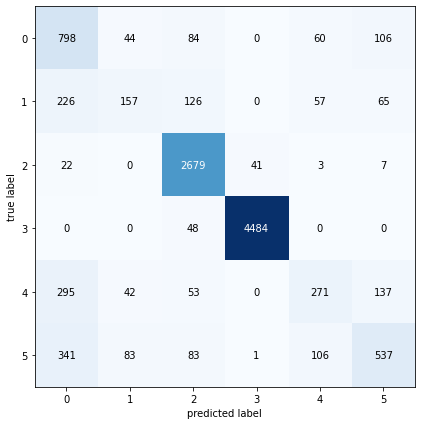

In [24]:
cm = confusion_matrix(df_test['label_id'], df_test['predict'])
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize = (15,7))
plt.show()

In [25]:
num_features = ['article_length','readability_index', 'linsear_write_formula', 'gunning_fog_index','smog_index','syllable_count', 'lexicon_count', 'sentence_count','num_difficult_words', 'dale_chall_readability_score']

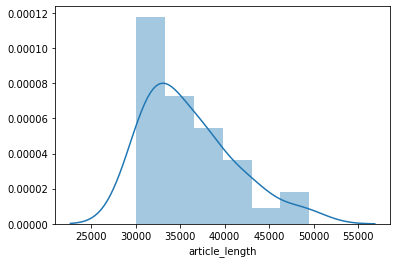

In [34]:
import seaborn as sns
sns.distplot(df_test[(df_test['label_id'] == 0)&(df_test['predict'] == 1)&(df_test['article_length'] < 50000)]['article_length'])

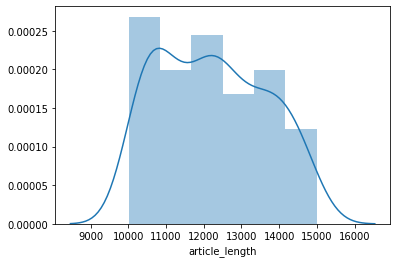

In [30]:
sns.distplot(df_test[(df_test['label_id'] == 1)&(df_test['predict'] == 1)]['article_length'])